<a href="https://colab.research.google.com/github/vishwa-vibhi/Machine_Learning/blob/main/ML_lab_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
       embed_0   embed_1  output
0    -0.089926  0.343874     0.0
1     0.303261  0.084930     0.0
2    -0.274291  0.216801     0.0
3     0.118676  0.095572     0.0
4     0.298772  0.300674     0.0
...        ...       ...     ...
1121 -0.316305  0.126331     5.0
1122 -0.342471  0.060391     5.0
1123 -0.379174  0.197136     5.0
1124 -0.379726  0.075891     5.0
1125 -0.279187  0.099571     5.0

[1126 rows x 3 columns]
Unique classes in target variable: [0.         0.25       0.375      0.5        0.625      0.75
 0.875      1.         1.125      1.15625    1.1875     1.25
 1.5        1.5625     1.625      1.65       1.75       1.875
 2.         2.125      2.25       2.3125     2.33333333 2.375
 2.4375     2.5        2.54166667 2.5625     2.625      2.65625
 2.66071429 2.66666667 2.6875     2.75       2.875      2.90625
 2.91666667 2.9375     3.         3.125  

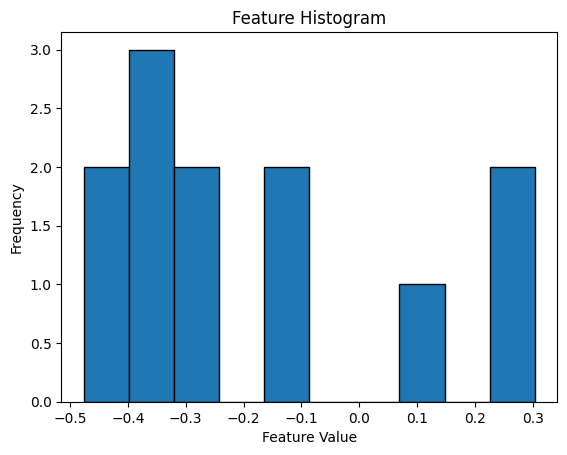

Mean: -0.17060784188409647, Variance: 0.06781512466859486


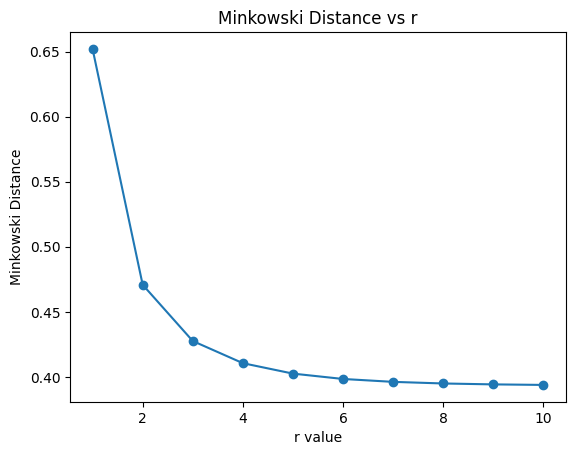

Model Accuracy: 0.75
Predictions: [0 0 0 0]


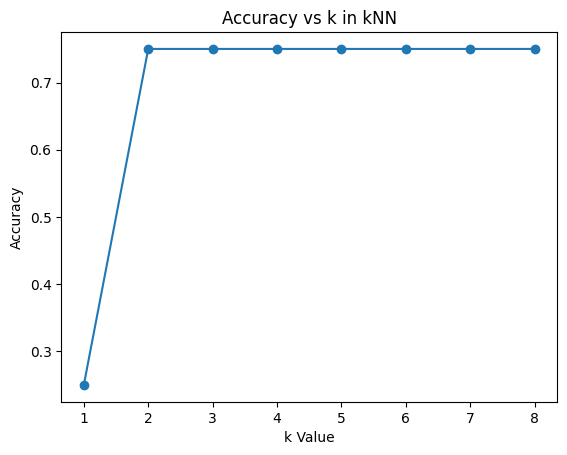

Confusion Matrix:
 [[3 0]
 [1 0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.75      1.00      0.86         3
           1       1.00      0.00      0.00         1

    accuracy                           0.75         4
   macro avg       0.88      0.50      0.43         4
weighted avg       0.81      0.75      0.64         4



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import LabelEncoder
from google.colab import drive
drive.mount('/content/drive')
# Load the dataset
file_path='/content/drive/MyDrive/Colab Notebooks/ML/training_mathbert.xlsx'
df=pd.read_excel(file_path,usecols=['embed_0','embed_1','output'])
print(df)
X=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

unique_classes=np.unique(y)
print("Unique classes in target variable:", unique_classes)
selected_classes=unique_classes[:2]  # Pick first two classes
mask=np.isin(y,selected_classes)
X,y=X[mask],y[mask]
y=LabelEncoder().fit_transform(y)
X_train,X_test,y_train,y_test=train_test_split(X, y,test_size=0.3,random_state=42)
def class_statistics(X, y):
    unique_classes=np.unique(y)
    centroids={}
    spreads={}
    for cls in unique_classes:
        class_data=X[y==cls]
        centroids[cls]=np.mean(class_data, axis=0)
        spreads[cls]=np.std(class_data,axis=0)
    class_pairs=[(c1, c2) for c1 in unique_classes for c2 in unique_classes if c1 < c2]
    distances = {pair: np.linalg.norm(centroids[pair[0]] - centroids[pair[1]]) for pair in class_pairs}
    return centroids, spreads, distances
centroids, spreads, distances = class_statistics(X, y)
print("Class Centroids:", centroids)
print("Class Spreads:", spreads)
print("Interclass Distances:", distances)


feature_index = 0  # Change as needed
feature_data = X[:, feature_index]
plt.hist(feature_data, bins=10, edgecolor='black')
plt.title('Feature Histogram')
plt.xlabel('Feature Value')
plt.ylabel('Frequency')
plt.show()
print(f"Mean: {np.mean(feature_data)}, Variance: {np.var(feature_data)}")


def minkowski_distance(x1, x2, r):
    return np.sum(np.abs(x1 - x2) ** r) ** (1 / r)
x1, x2 = X[0], X[1]
distances = [minkowski_distance(x1, x2, r) for r in range(1, 11)]
plt.plot(range(1, 11), distances, marker='o')
plt.xlabel('r value')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance vs r')
plt.show()

# Train kNN classifier (k=3)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(X_train, y_train)

# Evaluate accuracy
accuracy = neigh.score(X_test, y_test)
print(f"Model Accuracy: {accuracy}")

# Predictions
y_pred = neigh.predict(X_test)
print("Predictions:", y_pred)
y
accuracies = []
k_values = range(1, min(len(X_train), 11) + 1)
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracies.append(knn.score(X_test, y_test))
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.title('Accuracy vs k in kNN')
plt.show()

# Confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=1))


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
